# Data Prep
## Skip all this stuff to find results at the end

In [1]:
import pandas as pd
import numpy as np
import sklearn.decomposition
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import font_manager as fm, rcParams
%matplotlib inline


In [2]:
# Define dictionary of illumyx branded colors

illumyx_colors={'red':'#C8102E','orange':'#FF8200','yellow':'#FFC72C','green':'#97D700','blue':'#00AEC7','darkblue':'#00587C'}


correlation_cmap = mpl.colors.LinearSegmentedColormap.from_list('correlation_cmap', [illumyx_colors['orange'],'#ffffff',illumyx_colors['blue']],N=101)


In [3]:
def OneHotThemes(df, level='Themes', sep=','):
    """
    Takes dataframe question list and returns: 
        df = dataframe with a separate column for each theme
        theme_list = list of all themes
    To be used in calculating theme scores
    Sample line of code: theme_items = OneHotThemes(theme_items)
    
    df = Dataframe from csv of Qorder,Reverse,UniqueId,ItemText,Themes
    level (default='Themes') = Themes vs Subthemes or other
    sep (default=',') = Character used to separate themes listed in Themes column
    """
    
    theme_list_start = df.shape[1]
    
    df[level] = df[level].str.split(sep)
    for index, row in df.iterrows():
        for theme in row[level]:
            df.at[index, theme] = 1
    df = df.fillna(0)
    
    theme_list = list(df.columns[theme_list_start:df.shape[1]].sort_values())
    
    return df, theme_list

In [16]:
def reverse_code(survey_data, q_list):
    # Reverse code response values for negatively worded items
    reverse_items = q_list['UniqueId'][q_list['Reverse']==1].to_list()
    for item in reverse_items:
        survey_data['rev'+item] = (survey_data[item]-7)*-1
    return survey_data  

In [40]:
def get_items_in_theme(theme_items, theme):
    item_list = theme_items[['Reverse','UniqueId']][theme_items[theme]==1]
    pos_items = item_list['UniqueId'][item_list['Reverse']==0].to_list()
    neg_items = item_list['UniqueId'][item_list['Reverse']==1].apply(lambda x: 'rev'+x).to_list()
    item_list = pos_items+neg_items
    return item_list

In [67]:
sd = pd.read_csv('upload_to_portal.csv', sep=None, skiprows=[1])
sd.drop(['0','0.1','0.2','0.3','index'], axis=1, inplace=True)


In [68]:
q_list = pd.read_csv('q_list.csv')
theme_items = q_list[q_list['Themes'].notnull()]
theme_items.reset_index(drop=True, inplace=True)
dim_items = q_list[q_list['Dimension'].notnull()]
dim_items.reset_index(drop=True, inplace=True)
theme_items, all_themes = OneHotThemes(theme_items)
dim_items, all_dim = OneHotThemes(dim_items, level='Dimension')

In [69]:
reverse_code(sd, q_list)

,Demographic00,Demographic01,Demographic02,Demographic04,Demographic12,Demographic06,Demographic03,Demographic05,Demographic07,Demographic08,...,rev3Ddc32,rev3Ddc05,revtms13,rev4Dpr28,rev7Dsc10,rev5Dls27,rev7Dsc05,rev7Dsc06,rev8Dic38,rev8Dic49
0,1.0,4.0,5.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,5.0,NaN,NaN,5.0,NaN,NaN,2.0,NaN,...,6.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,2.0,5.0
2,1.0,1.0,6.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,...,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0
3,1.0,4.0,6.0,4.0,4.0,NaN,NaN,NaN,2.0,NaN,...,5.0,4.0,6.0,3.0,1.0,4.0,1.0,1.0,3.0,4.0
4,1.0,4.0,5.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,...,6.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [70]:
sd.drop([969,968,967,966,965,964], inplace=True)


In [38]:
def CorrelationHeatMap(survey_data, variables, withvar=None, colormap=correlation_cmap, filename=None, dpi=300):
    '''
    Generate heatmap plot of correlation table and save it as a png
    
    survey_data: a dataframe of survey results, with demographic strings and calculated theme scores attached
    variables: list of variables for measuring correlations
    withvar: measure correlation of 'variables' with a single other variable (default:None)
    colormap: the colormap to use for shading theme scores
    filename: if not None, will save output as input here
    dpi: if file to be saved, dpi of file
    '''
    
    if withvar==None:
        df = survey_data[variables].corr()
        height = 1+len(df)*0.5
        width = height*1.25
    elif len(withvar)==1:
        df = survey_data[variables].corrwith(survey_data[withvar]).to_frame(name=withvar)
        height = len(df)*0.70
        width = df.shape[1]*1.5
    
    fig, ax = plt.subplots(figsize=(width,height),
                           facecolor='white',
                           constrained_layout=True)
    ax=sns.heatmap(data=df,
                    cmap=colormap,
                   vmin=-1,
                   vmax=1,
                   annot=True,
                   linewidths=0.5,
                   square=True)
    bottom, top = ax.get_ylim()
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
    plt.xticks(rotation=45, ha='left')
    plt.yticks(rotation=0)
    ax.set_ylim(bottom+0.5, top-0.5)
    
    #TODO if variable is a survey item, replace y label with item text?
    
    # Save the plot as an image file for inserting into report page
    if filename!=None:
        SaveAndClose(fig,filename,dpi)

 
    plt.show()

In [20]:
def cronbach_alpha(df):
    # Credit: Max Hilfsdorf, towardsdatascience.com
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array called "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
        mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [63]:
def scale_reliability(df, q_list):
    item_list = list(df.columns)
    print(f"Cronbach's alpha: {cronbach_alpha(df)} \n")
    #df_corr = df.corr()
    #alpha_if_removed = [cronbach_alpha(df[item_list.copy().remove(item)]) for item in item_list]
    
    alpha_if_removed = []
    item_text=[]
    for item in item_list:
        temp_list = item_list.copy()
        temp_list.remove(item)
        alpha_if_removed.append(cronbach_alpha(df[temp_list]))
        if 'rev' in item:
            item_id = item[3:]
        else:
            item_id = item
        item_text.append(q_list.loc[q_list.UniqueId==item_id, 'ItemText'].reset_index(drop=True)[0])
    
    report_df = pd.DataFrame(data={'item_id':item_list, 'alpha_if_removed':alpha_if_removed, 'item_text':item_text})
    
    display(report_df)
    #print(f"{report_df}\n")
    CorrelationHeatMap(df, item_list)
    #print(f"Item Correlations:\n{df[item_list].corr()}")
    


# Scale Reliability for all Themes
### The nine values themes and four illumyx themes

Theme Name: Collaborate: Embrace New Ideas
Cronbach's alpha: 0.8449593769554259 



,item_id,alpha_if_removed,item_text
0,values10,0.809887,I feel included at AHEAD.
1,values40,0.823390,At AHEAD there is a great deal of openness in ...
2,1Dtp20,0.820007,Relationships at our organization are ‘tight-k...
3,1Dtp21,0.807497,Our organization values leaders for how they t...
4,7Dsc27,0.828587,When major organizational changes are made the...
5,1Dtp31,0.847813,In order to be successful here employees need ...
6,1Dtp23,0.831981,Our organization values leaders for their tech...
7,rev8Dic38,0.840025,I do not feel a strong sense of belonging at A...


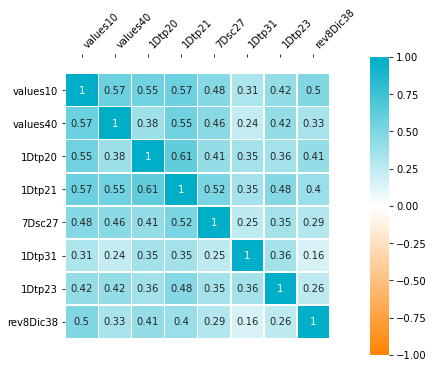




Theme Name: Collaborate: Share Ideas
Cronbach's alpha: 0.6831559298653322 



,item_id,alpha_if_removed,item_text
0,values1,0.537629,I have access to tools and resources to effect...
1,values3,0.606678,I know who to reach out to for specific knowle...
2,Custom078,0.622062,I know how to effectively utilize the collabor...


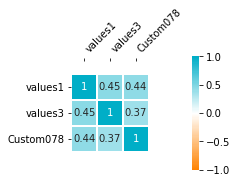




Theme Name: Collaborate: Unite Around Objectives
Cronbach's alpha: 0.8775727747313481 



,item_id,alpha_if_removed,item_text
0,values7,0.861330,I hear enough communication from the leadershi...
1,values42,0.853112,Leaders at AHEAD regularly share the long-term...
2,tbi02,0.875069,People in our team feel that they are all pull...
3,tbi32,0.856276,There is a shared vision about what we are try...
4,5Dls26,0.849795,Management regularly shares the company's long...
5,5Dls09,0.842400,I hear a consistent view of the organization's...


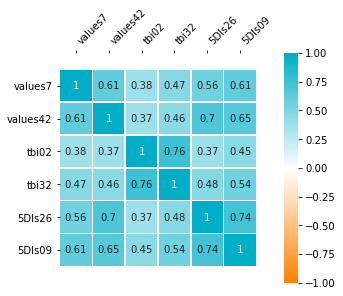




Theme Name: Commitment & Retention
Cronbach's alpha: 0.9069957444355022 



,item_id,alpha_if_removed,item_text
0,values45,0.890366,The type of work we do at AHEAD motivates me t...
1,values46,0.888811,The culture at AHEAD motivates me to continue ...
2,values47,0.896511,The talent at AHEAD motivates me to continue t...
3,8Dic19,0.906118,Compensation at AHEAD motivates me to continue...
4,8Dic35,0.885237,I feel valued for my contributions at AHEAD.
5,8Dic16,0.897150,I receive meaningful recognition for my contri...
6,8Dic31,0.886790,I find my work at AHEAD rewarding.


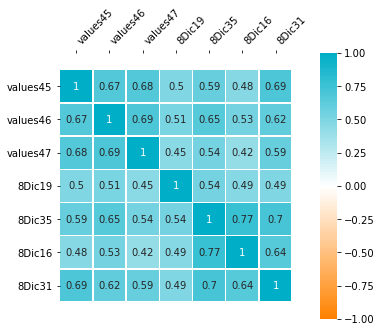




Theme Name: Drive: Be Accountable
Cronbach's alpha: 0.7045705037685734 



,item_id,alpha_if_removed,item_text
0,values4,0.630058,I understand how the results I achieve relate ...
1,values5,0.631908,I understand the outcomes I have to achieve to...
2,values26,0.665594,Workload is fairly allocated across my team.
3,1Dtp24,0.651922,During work hours employees are intently focus...
4,5Dls05,0.702338,I am held accountable for completing daily tasks.
5,revMisc06,0.700844,Low performance is tolerated at AHEAD.


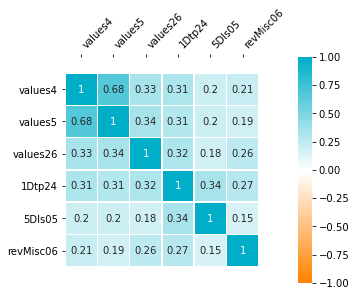




Theme Name: Drive: Push Through Adversity
Cronbach's alpha: 0.7533149856810353 



,item_id,alpha_if_removed,item_text
0,values31,0.722862,We proactively drive our own professional deve...
1,values34,0.689956,At AHEAD we're actively encouraged to try new ...
2,values36,0.744449,Being a self-starter is important to being suc...
3,values38,0.694624,At AHEAD we quickly make decisions.
4,value39,0.692109,At AHEAD we quickly implement decisions once t...


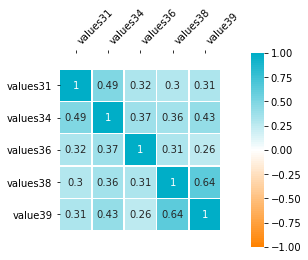




Theme Name: Drive: Solve Problems
Cronbach's alpha: 0.7885877542699365 



,item_id,alpha_if_removed,item_text
0,values6,0.766383,I have the freedom to go to anyone in the orga...
1,values8,0.765138,I have autonomy to do what I think is best for...
2,3Ddc33,0.757892,I have the freedom to make decisions that affe...
3,4Dpr33,0.783818,We often adjust and adapt plans to meet custom...
4,4Dpr34,0.772078,We respond quickly when problems arise.
5,4Dpr36,0.768338,People on my team do whatever it takes to meet...
6,tbi12,0.768129,People on my team are willing to cut through b...
7,6Dpe07,0.764426,My direct supervisor gives me the freedom to c...
8,rev3Ddc32,0.781776,My direct supervisor overrides decisions made ...
9,rev3Ddc05,0.775255,Employees at AHEAD wait to be told what to do.


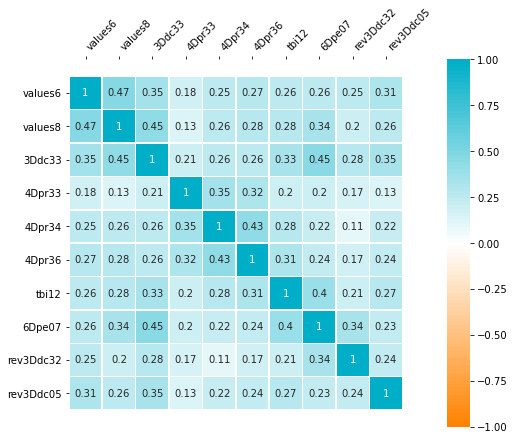




Theme Name: Innovate: Strive to Improve
Cronbach's alpha: 0.6497860456698145 



,item_id,alpha_if_removed,item_text
0,values27,0.590218,Creativity is celebrated at AHEAD.
1,2Dit20,0.611843,I am exposed to cross-training or skill-sharin...
2,tbi05,0.608797,My manager provides rewards and recognition fo...
3,revvalues24,0.637328,People on my team have a difficult time accept...
4,revvalues28,0.605893,Policies and procedures often stop the impleme...
5,revvalues2,0.586851,The lack of processes and procedures often hin...


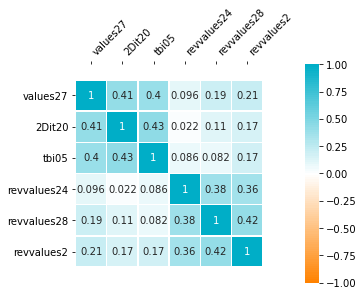




Theme Name: Innovate: Take Educated Risks
Cronbach's alpha: 0.7534985699818468 



,item_id,alpha_if_removed,item_text
0,4Dpr35,0.697815,We evaluate different approaches before decidi...
1,4Dpr32,0.745054,At AHEAD once we have a plan we stick with it.
2,4Dpr05,0.709835,We anticipate problems before moving to action.
3,revtms13,0.708895,My team needs to backtrack and start over a lot.
4,rev4Dpr28,0.710956,We promise things to customers before knowing ...
5,rev7Dsc10,0.733028,I often have to react to problems because a ch...


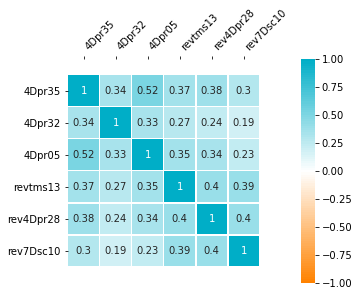




Theme Name: Innovate: Think Like a Startup
Cronbach's alpha: 0.7290341510552699 



,item_id,alpha_if_removed,item_text
0,values19,0.698137,People on my team are given time resources and...
1,7Dsc22,0.629989,We are often looking for the ‘next thing’ to k...
2,7Dsc33,0.593792,We challenge the status quo.
3,rev7Dsc06,0.737453,We don't change how we do things unless we hav...


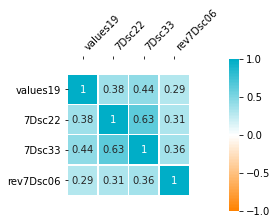




Theme Name: Manager Relationship
Cronbach's alpha: 0.8771330750716778 



,item_id,alpha_if_removed,item_text
0,values13,0.855064,My manager follows through on commitments.
1,values14,0.855754,My manager provides me with meaningful develop...
2,2Dit41,0.883212,When problems arise I primarily rely on my dir...
3,2Dit44,0.864694,I receive recognition from my direct superviso...
4,3Ddc25,0.863725,My direct leader asks for input from employees...
5,3Ddc28,0.866245,When faced with uncertainty I go to my direct ...
6,3Ddc35,0.851497,My direct supervisor takes decisive action.
7,3Ddc34,0.853278,My direct supervisor keeps our group focused o...


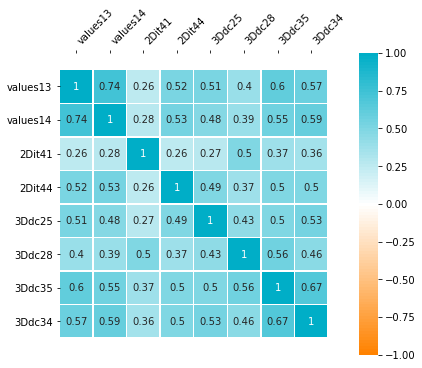




Theme Name: Teamwork
Cronbach's alpha: 0.8298214080473756 



,item_id,alpha_if_removed,item_text
0,values9,0.799563,I am confident relying on the expertise of my ...
1,values21,0.792311,People on my team consistently follow through ...
2,values23,0.804604,People on my team do whatever it takes to meet...
3,2Dit32,0.835848,When problems arise I primarily rely on my tea...
4,2Dit22,0.803594,Peers recognize each other for exceptional per...
5,2Dit23,0.796090,My organization encourages employees to work t...
6,revtbi14,0.813141,There is a lack of teamwork in our group.


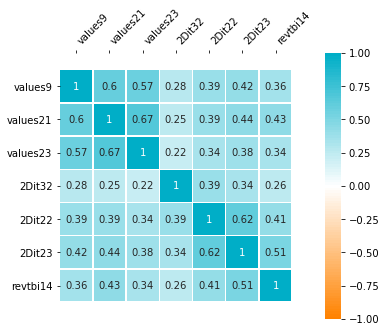




Theme Name: Trust & Respect
Cronbach's alpha: 0.8243351048113361 



,item_id,alpha_if_removed,item_text
0,values15,0.762975,People at AHEAD treat each other with respect.
1,values16,0.766454,People at AHEAD are equally valued regardless ...
2,values17,0.796687,People on my team embrace the views of others.
3,values32,0.797364,Company policies are applied consistently at A...
4,rev1Dtp32,0.822758,Unprofessional behavior is tolerated at AHEAD.
5,rev8Dic49,0.824296,When there is a problem it is common for someo...


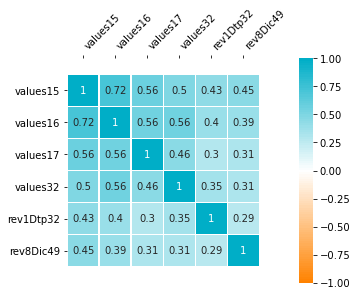

In [71]:
for theme in all_themes:
    print(f"Theme Name: {theme}")
    scale_reliability(sd[get_items_in_theme(theme_items, theme)],q_list)
    print('\n\n')

# Scale Reliability for Eight Dimension


Theme Name: Directive vs. Empowered
Cronbach's alpha: 0.754698079551203 



,item_id,alpha_if_removed,item_text
0,3Ddc33,0.736951,I have the freedom to make decisions that affe...
1,3Ddc25,0.699188,My direct leader asks for input from employees...
2,3Ddc28,0.728763,When faced with uncertainty I go to my direct ...
3,3Ddc35,0.689173,My direct supervisor takes decisive action.
4,3Ddc34,0.691613,My direct supervisor keeps our group focused o...
5,rev3Ddc32,0.752147,My direct supervisor overrides decisions made ...
6,rev3Ddc05,0.765715,Employees at AHEAD wait to be told what to do.


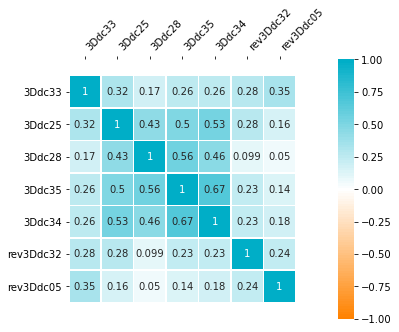




Theme Name: Indifferent vs. Committed
Cronbach's alpha: 0.8478555343558929 



,item_id,alpha_if_removed,item_text
0,8Dic35,0.755463,I feel valued for my contributions at AHEAD.
1,8Dic16,0.790326,I receive meaningful recognition for my contri...
2,8Dic31,0.790414,I find my work at AHEAD rewarding.
3,rev8Dic38,0.878864,I do not feel a strong sense of belonging at A...


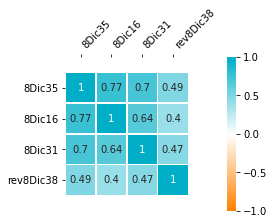




Theme Name: Individual vs. Team
Cronbach's alpha: 0.7379952801192816 



,item_id,alpha_if_removed,item_text
0,2Dit32,0.715436,When problems arise I primarily rely on my tea...
1,2Dit22,0.664872,Peers recognize each other for exceptional per...
2,2Dit23,0.664953,My organization encourages employees to work t...
3,2Dit41,0.754169,When problems arise I primarily rely on my dir...
4,2Dit44,0.706159,I receive recognition from my direct superviso...
5,revtbi14,0.697793,There is a lack of teamwork in our group.
6,rev2Dit43,0.733056,I primarily work alone to solve problems.


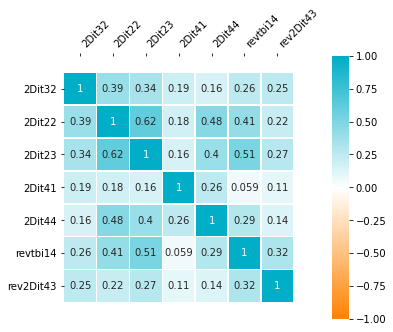




Theme Name: Long-Term vs. Short-Term
Cronbach's alpha: 0.7523845055351877 



,item_id,alpha_if_removed,item_text
0,5Dls05,0.781761,I am held accountable for completing daily tasks.
1,tbi02,0.681738,People in our team feel that they are all pull...
2,tbi32,0.658420,There is a shared vision about what we are try...
3,5Dls26,0.691846,Management regularly shares the company's long...
4,5Dls09,0.676695,I hear a consistent view of the organization's...
5,rev5Dls27,0.781145,We delay long-term projects to achieve day-to-...


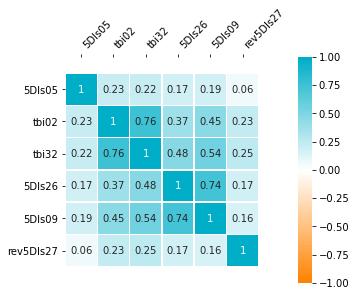




Theme Name: Planning vs. Responsive
Cronbach's alpha: 0.7644308445090975 



,item_id,alpha_if_removed,item_text
0,4Dpr33,0.773579,We often adjust and adapt plans to meet custom...
1,4Dpr34,0.738451,We respond quickly when problems arise.
2,4Dpr35,0.716698,We evaluate different approaches before decidi...
3,4Dpr32,0.754015,At AHEAD once we have a plan we stick with it.
4,4Dpr36,0.740430,People on my team do whatever it takes to meet...
5,4Dpr05,0.724079,We anticipate problems before moving to action.
6,revtms13,0.733560,My team needs to backtrack and start over a lot.
7,rev4Dpr28,0.745268,We promise things to customers before knowing ...
8,rev7Dsc10,0.751217,I often have to react to problems because a ch...


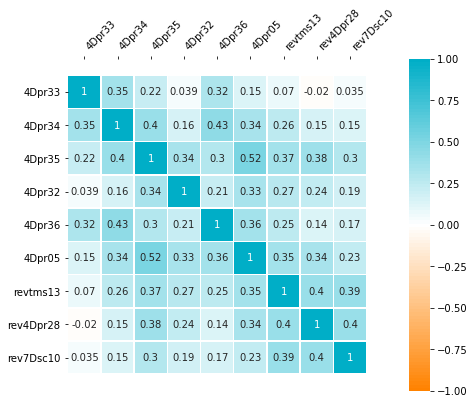




Theme Name: Process vs. End Results
Cronbach's alpha: 0.5593090403975474 



,item_id,alpha_if_removed,item_text
0,tbi12,0.587118,People on my team are willing to cut through b...
1,6Dpe07,0.575983,My direct supervisor gives me the freedom to c...
2,6Dpe29,0.516962,People on my team rely on documented processes...
3,6Dpe23,0.397646,We primarily follow standard processes in orde...
4,6Dpe28,0.401677,We have the processes systems and leaders in p...


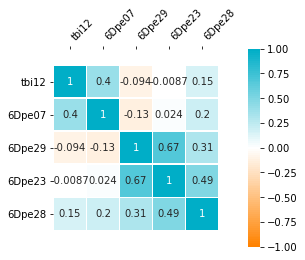




Theme Name: Stability vs. Change
Cronbach's alpha: 0.5722915728305897 



,item_id,alpha_if_removed,item_text
0,7Dsc22,0.376020,We are often looking for the ‘next thing’ to k...
1,7Dsc32,0.705672,Our organization sticks with what works.
2,7Dsc33,0.343316,We challenge the status quo.
3,tbi05,0.476859,My manager provides rewards and recognition fo...
4,rev7Dsc06,0.569713,We don't change how we do things unless we hav...


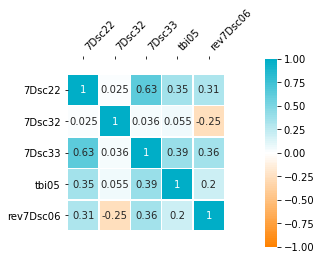




Theme Name: Tasks vs. Relationships
Cronbach's alpha: 0.7842447706673302 



,item_id,alpha_if_removed,item_text
0,1Dtp20,0.752767,Relationships at our organization are ‘tight-k...
1,1Dtp21,0.728911,Our organization values leaders for how they t...
2,7Dsc27,0.756389,When major organizational changes are made the...
3,1Dtp31,0.772373,In order to be successful here employees need ...
4,1Dtp23,0.749476,Our organization values leaders for their tech...
5,1Dtp24,0.764242,During work hours employees are intently focus...
6,revMisc06,0.781774,Low performance is tolerated at AHEAD.
7,rev1Dtp32,0.775531,Unprofessional behavior is tolerated at AHEAD.


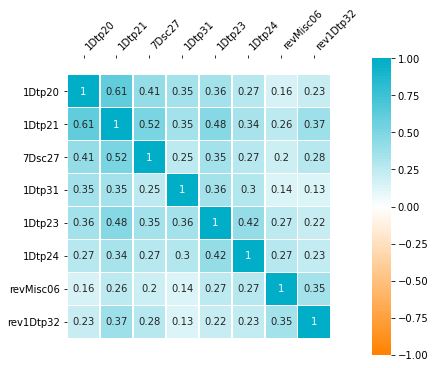

In [72]:
for dim in all_dim:
    print(f"Theme Name: {dim}")
    scale_reliability(sd[get_items_in_theme(dim_items, dim)], q_list)
    print('\n\n')

In [79]:
items = ['7Dsc32']
for item in items:
    sd['rev'+item] = (sd[item]-7)*-1

Cronbach's alpha: 0.5102045395061136 



,item_id,alpha_if_removed,item_text
0,revtbi12,0.542246,People on my team are willing to cut through b...
1,rev6Dpe07,0.554388,My direct supervisor gives me the freedom to c...
2,6Dpe29,0.276202,People on my team rely on documented processes...
3,6Dpe23,0.300200,We primarily follow standard processes in orde...
4,6Dpe28,0.518936,We have the processes systems and leaders in p...


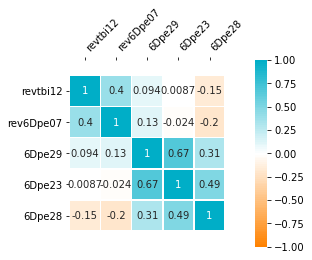

In [78]:
proc_end = ['revtbi12','rev6Dpe07','6Dpe29','6Dpe23','6Dpe28']
scale_reliability(sd[proc_end], q_list)

Cronbach's alpha: 0.610420534862215 



,item_id,alpha_if_removed,item_text
0,7Dsc22,0.475953,We are often looking for the ‘next thing’ to k...
1,rev7Dsc32,0.705672,Our organization sticks with what works.
2,7Dsc33,0.455997,We challenge the status quo.
3,tbi05,0.571079,My manager provides rewards and recognition fo...
4,rev7Dsc06,0.515675,We don't change how we do things unless we hav...


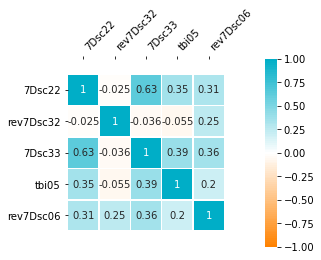

In [80]:
stab_change = ['7Dsc22','rev7Dsc32','7Dsc33','tbi05','rev7Dsc06']
scale_reliability(sd[stab_change], q_list)